In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from pandas.plotting._core import plot_frame

crime_data = pd.read_csv('http://cluster.earlham.edu/~apc0013/Chicago_crime.csv')

## Exploratory Data Analysis

### Maps of crime in Chicago

In [ ]:
def draw_map():
    chicago_map = geopandas.GeoDataFrame.from_file('map/chicago.shp')
    plt.rcParams["figure.figsize"]=(20,20)
    chicago_map.plot(cmap='autumn')
    plt.title("Crime Map of Chicago")
    plt.xlabel("Logitude")
    plt.ylabel("Latitude")

In [ ]:
# There is an outlier in the dataset
plt.scatter(x=crime_data["Longitude"], y=crime_data["Latitude"], color="r")

In [ ]:
# Get rid of the outlier
crime_data = crime_data[crime_data["Longitude"] != crime_data["Longitude"].min()]
crime_data.head()

In [ ]:
# Getting districts for having the location markers
districts = crime_data[["Longitude", "Latitude", "District"]].groupby("District").mean()
districts.index = districts.index.astype(int)
districts.head()

In [ ]:
x = crime_data[["Year", "ID"]].groupby("Year").count().index
y = crime_data[["Year", "ID"]].groupby("Year").count()["ID"]

plt.plot(x, y)
plt.rcParams["figure.figsize"]=(20,20)
plt.scatter(x=x, y=y, color="y")
plt.scatter(x=2002, y=crime_data[["Year", "ID"]].groupby("Year").count().max(), color="r")
plt.xticks(x)
plt.show()

In [ ]:
#Crimes by region
crimes_by_region = crime_data[["Year", "District", "ID"]][crime_data["Year"]==2002].groupby("District").count()
crimes_by_region.index = crimes_by_region.index.astype(int)
crimes_by_region = pd.concat([crimes_by_region[['ID']], districts], sort=True, axis=1).fillna(0)

draw_map()
sns.scatterplot(x="Longitude", y="Latitude", size="ID", hue="ID", sizes=(0, 1000), data=crimes_by_region, legend="full", color='black')


### Graphs of crime in Chicago

Text(0,0.5,'Percentage of Crimes')

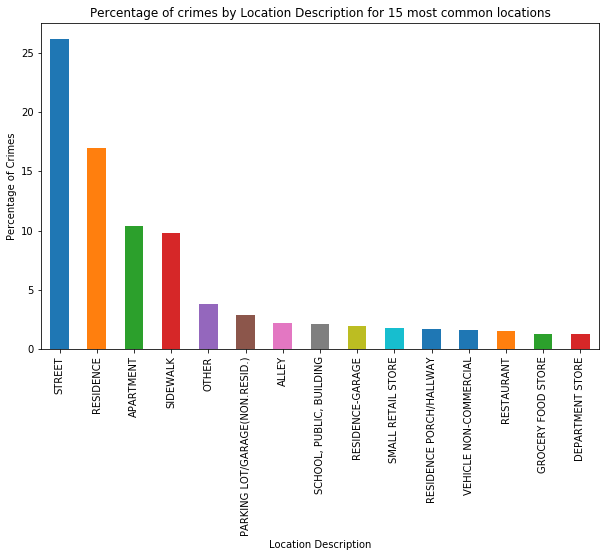

In [7]:
# %crimes by location description (10 most common locations) 

percent = crime_data['Location Description'].value_counts(normalize=True).apply(lambda x: 100*x)[:15]
fig = plt.figure(figsize=(10,6)) 
ax = fig.gca()     
percent.plot.bar(ax = ax) 
ax.set_title('Percentage of crimes by Location Description for 15 most common locations') 
ax.set_xlabel('Location Description')
ax.set_ylabel('Percentage of Crimes')

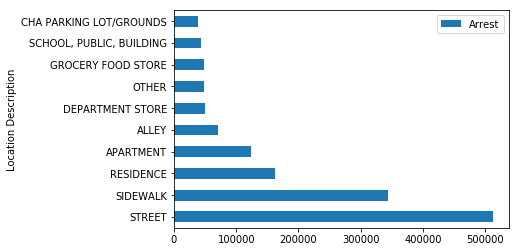

In [8]:
#Top ten places that an arrest is likely to occur in Chicago
foo = crime_data[['Location Description','Arrest']].groupby('Location Description').sum(axis=1).sort_values(by = 'Arrest',ascending = False)[:10]
foo.plot(kind='barh')

#### Analysis of crime by Primary Type

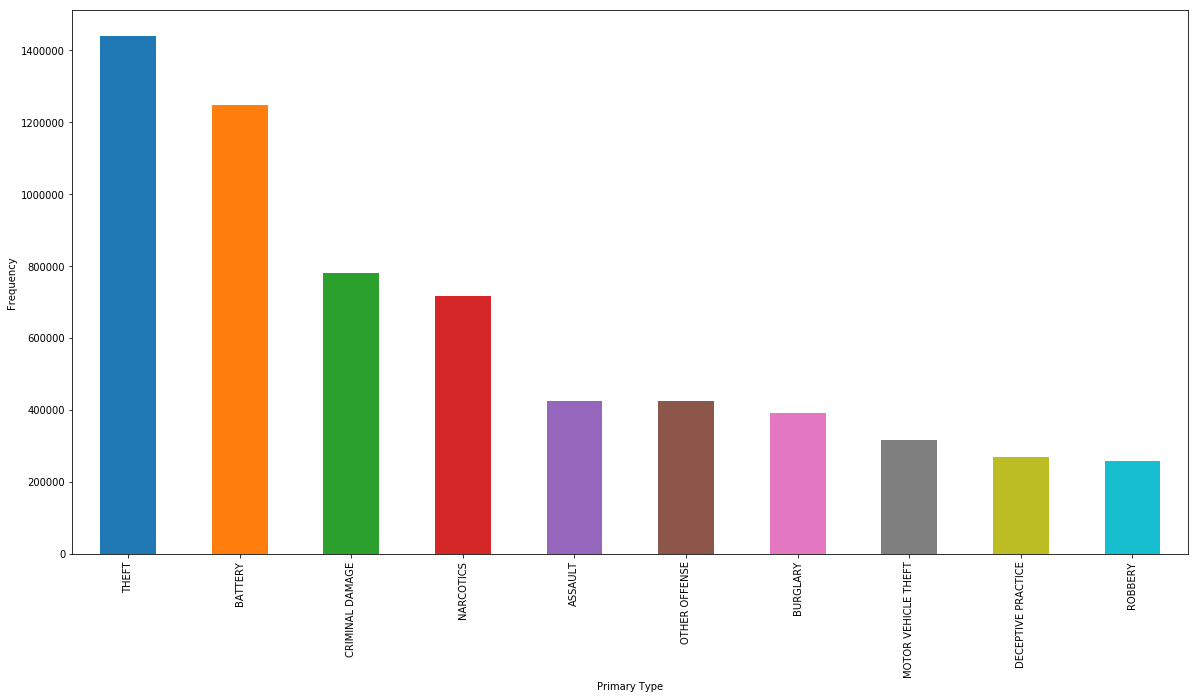

In [9]:
#Frequency of theft based on location
plt.figure(figsize=(20,10))
plt.ylabel('Frequency')
plt.xlabel('Type of Offence')
crime_type = crime_data.groupby([crime_data['Primary Type']]).size().sort_values(ascending=False).head(10)
crime_type.plot(kind='bar', style='seaborn-paper')

Text(0,0.5,'Percentage of Crimes')

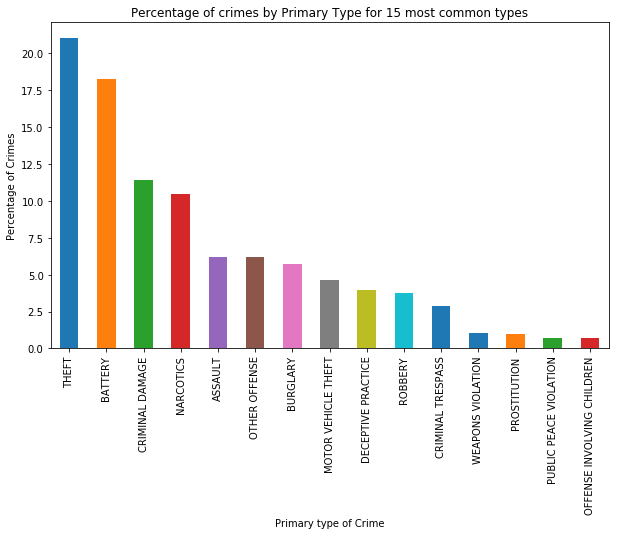

In [10]:
# %crimes by crime type (10 most common crime types) 

percent = crime_data['Primary Type'].value_counts(normalize=True).apply(lambda x: 100*x)[:15]
fig = plt.figure(figsize=(10,6)) 
ax = fig.gca()     
percent.plot.bar(ax = ax) 
ax.set_title('Percentage of crimes by Primary Type for 15 most common types') 
ax.set_xlabel('Primary type of Crime')
ax.set_ylabel('Percentage of Crimes')

In [11]:
# Likelihood of getting Arrested for the top 20 crime types in Chicago

true = crime_data[crime_data['Arrest']==True]
false = crime_data[crime_data['Arrest']==False]
arrestt = crime_data['Primary Type'].value_counts().head(20).to_frame()
tru = true['Primary Type'].value_counts().to_frame()
fals = false['Primary Type'].value_counts().to_frame()

In [12]:
# Percentage of People getting arrested for these crimes

arrested_development = pd.merge(arrestt, tru, how= 'left', left_index= True, right_index=True)
arrested_development = pd.merge(arrested_development, fals, how= 'left', left_index= True, right_index=True)
arrested_development.rename(columns={'Primary Type_x':'Total','Primary Type_y':'Arrested','Primary Type': 'Not Arrested'}, inplace=True)
arrested_development['Percentage Arrested'] = (arrested_development['Arrested']/arrested_development['Total'])*100
arrested_development.reset_index(inplace=True)
arrested_development.rename(columns={'index': 'Primary Type'}, inplace=True)
arrested_development.sort_values(by=['Percentage Arrested'],inplace=True, ascending = False)
arrested_development

,Primary Type,Total,Arrested,Not Arrested,Percentage Arrested
12,PROSTITUTION,68549,68282,267,99.610498
3,NARCOTICS,716044,711834,4210,99.412047
18,GAMBLING,14437,14332,105,99.272702
19,LIQUOR LAW VIOLATION,14125,13998,127,99.100885
17,INTERFERENCE WITH PUBLIC OFFICER,15584,14310,1274,91.824949
11,WEAPONS VIOLATION,72568,57531,15037,79.278745
10,CRIMINAL TRESPASS,195678,142952,52726,73.054712
13,PUBLIC PEACE VIOLATION,48274,31008,17266,64.233335
16,SEX OFFENSE,25563,7777,17786,30.422877
4,ASSAULT,425168,97987,327181,23.046654


Text(0,0.5,'Percentage of Crimes')

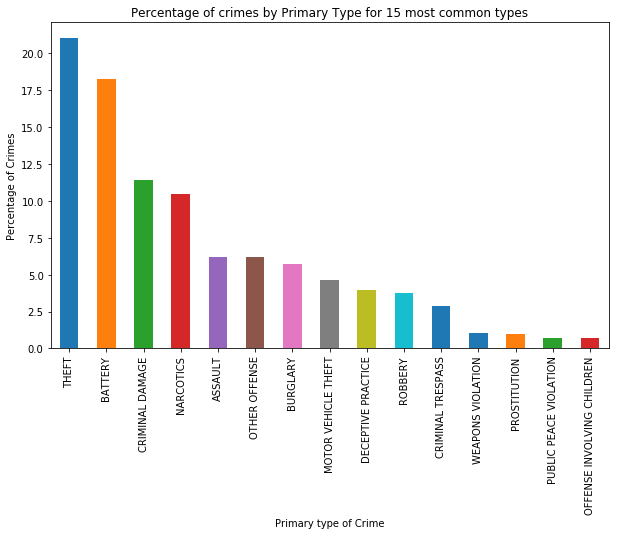

In [13]:
#  %crimes by crime type (10 most common crime types) 
percent = crime_data['Primary Type'].value_counts(normalize=True).apply(lambda x: 100*x)[:15]
fig = plt.figure(figsize=(10,6)) 
ax = fig.gca()     
percent.plot.bar(ax = ax) 
ax.set_title('Percentage of crimes by Primary Type for 15 most common types') 
ax.set_xlabel('Primary type of Crime')
ax.set_ylabel('Percentage of Crimes')

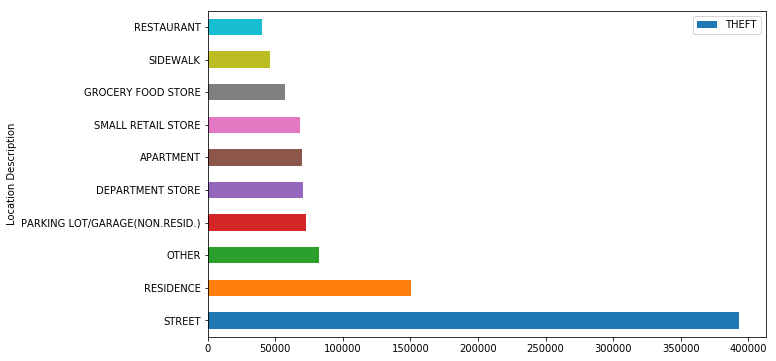

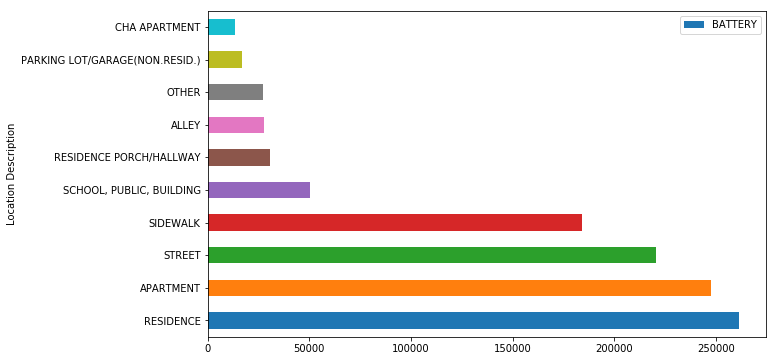

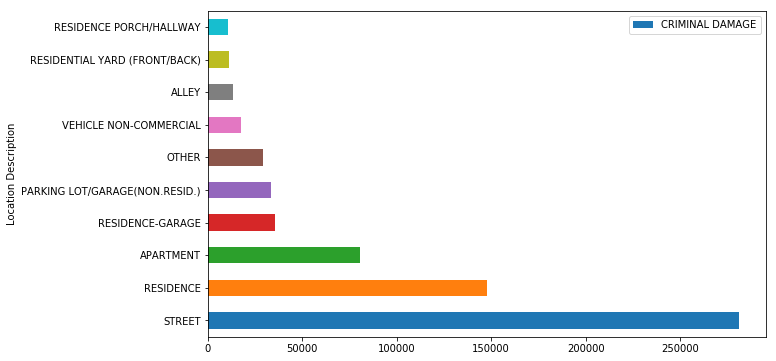

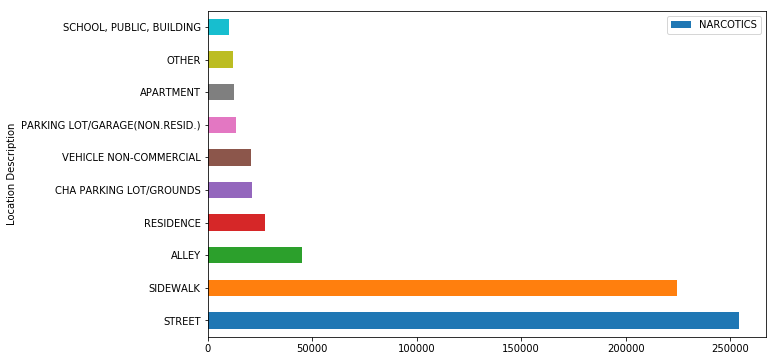

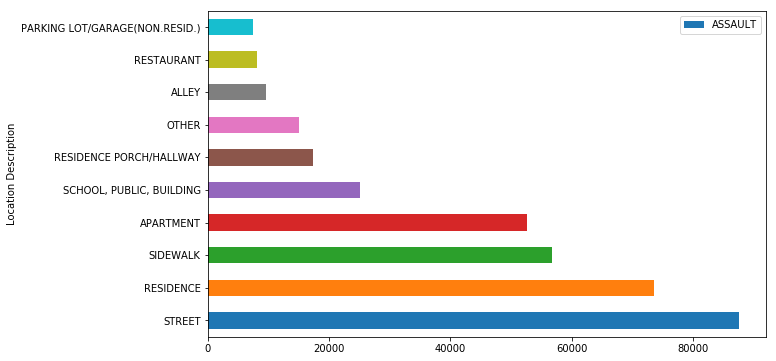

In [14]:
#  Most common Locations based on type of crime for top ten highest occuring crimes
import numpy as np
import seaborn as sns
location_by_type  = crime_data.pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size).fillna(0)
columns =  location_by_type.sum().sort_values(ascending=False).keys()[:5]

def plot_pivot_location_by_type(pivot_table,row):
    fig = plt.figure(figsize=(10,6)) 
    ax = fig.gca()
    pivot_table[row].sort_values(ascending= False)[:10].plot(kind='barh').legend()
   

for col in columns:
    plot_pivot_location_by_type(location_by_type,col)

## Data Processing

In [15]:
# Converting 'Date' to datetime format
date_format = '%m/%d/%Y %I:%M:%S %p'
crime_data['Date'] = pd.to_datetime(crime_data['Date'].astype(str), format =date_format)

#Converting to int so that it may be used in the classification models
crime_data['Date'] = crime_data['Date'].astype(int)

In [16]:
#picking Primary Types with > 5000 samples
primary_type = crime_data['Primary Type'].value_counts()[:23].keys()
crime_data = crime_data.loc[crime_data['Primary Type'].isin(primary_type)] 

In [17]:
# picking  Descriptions with > 5000 samples
description = crime_data['Description'].value_counts()[:98].keys()
crime_data = crime_data.loc[crime_data['Description'].isin(description)] 

In [18]:
# picking Location Descriptions with > 5000 samples
location_description = crime_data['Location Description'].value_counts()[:58].keys()
crime_data = crime_data.loc[crime_data['Location Description'].isin(location_description)] 



In [ ]:
#We now have fewer categories for each categorical column, so we can reliably encode them 
#Using one-hot encoding

#checking number of features by category
categorical = ['District','Description','Location Description']

print('number of disinct categories by feature')
for cat in categorical:    
    print(cat + " : "+ str(len(crime_data[cat].value_counts())) )

In [20]:
#Encoding categorical features
categorical = ['District','Description','Location Description']
prefixes =  ['District_','Description_','Location Description_']
crime_data = pd.get_dummies(crime_data, columns= categorical, prefix = prefixes)



In [21]:
# Feature Selection

unused = ['Beat','Block','Community Area','Case Number','District','FBI Code','ID','IUCR','Location','Updated On','Ward']
crime_data = crime_data[[col for col in crime_data if (col not in unused)]]



In [22]:
# At this point there are 4 features with Nan values [Latitude, Longitude, X-coordinate, Y- coordinate ]
# All of the Nans appear in the same 55055 rows, so we can simply drop them

crime_data.dropna(inplace=True)

In [23]:
#Picking a subset of the crime data, by taking every 5th row
#the dataset still has >6mil rows
sampled_crime_data = crime_data[1:6486635:5]
sampled_crime_data.shape

(1297327, 189)

## Models

In [24]:
#Function to test models

from sklearn.model_selection import train_test_split, learning_curve
from sklearn import metrics
# Model Functions 
def evaluate_model(model,X_test,y_test):
    y_predicted = model.predict(X_test)
    model_score = model.score(X_test,y_test) 
    recall_score = metrics.recall_score(y_test,y_predicted, average = None)
    accuracy_score = metrics.accuracy_score(y_test,y_predicted)
    precision_score = metrics.precision_score(y_test,y_predicted,average = None)   
    
    print('model score : ' + str(model_score) )
    print('accuracy score : ' + str(accuracy_score))
    print('precision score : ' + str(precision_score)  )
    print('recall score : ' + str(recall_score))
    

def test_model(df,model,features,**kwargs):
    X = df[features]
    y = df['Primary Type']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    model.fit(X_train,y_train)
    evaluate_model(model,X_test,y_test,**kwargs)   

In [25]:
#Decision Tree
#The best model by our metrics
# ~0.93 accuracy
#High recall snd precision scores
from sklearn import tree

features = [col for col in crime_data if (col != 'Primary Type')]

decision_tree = tree.DecisionTreeClassifier()
test_model(sampled_crime_data,decision_tree,features)

model score : 0.9323101019942528
accuracy score : 0.9323101019942528
precision score : [0.87552743 0.49860389 0.83102841 0.99984703 0.8705036  0.987426
 0.952386   0.9999135  1.         1.         1.         0.08333333
 1.         0.99997001 1.         1.         1.         1.
 0.99565077 1.         1.         0.999656  ]
recall score : [0.90217391 0.49954179 0.83018899 0.99994901 0.89851485 0.9882026
 0.94946612 0.99982702 1.         1.         1.         0.06060606
 0.99993495 0.99997001 1.         0.9999491  1.         1.
 0.99500966 1.         0.99998564 1.        ]


In [26]:
#Random Forest
#~0.92 accuracy 
#High recall snd precision scores
from sklearn import ensemble

features = [col for col in crime_data if (col != 'Primary Type')]

random_forest = ensemble.RandomForestClassifier()
test_model(sampled_crime_data,random_forest,features)

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


model score : 0.9386246192173452
accuracy score : 0.9386246192173452
precision score : [0.91011236 0.54260721 0.83988507 0.99984702 0.98507463 0.98563181
 0.99186992 0.99853094 1.         0.99672131 0.99635036 0.16666667
 0.99993493 0.99916072 0.99731724 0.99949107 1.         1.
 0.99342052 1.         0.99998564 1.        ]
recall score : [0.88043478 0.52057107 0.85246008 0.99989801 0.89851485 0.99811242
 0.94153716 0.99939457 0.99832215 1.         0.98201439 0.03030303
 0.99973979 0.99967012 0.99398396 0.99954194 0.99966353 0.99944072
 0.99653896 0.99348837 0.99984209 1.        ]


In [ ]:
#Logistic Regression
from sklearn import linear_model
features = [col for col in crime_data if (col != 'Primary Type')]

logistic_regression = linear_model.LogisticRegression()
test_model(sampled_crime_data,logistic_regression,features)

In [ ]:
#KNN
from sklearn import neighbors
features = [col for col in crime_data if (col != 'Primary Type')]

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
test_model(sampled_crime_data,knn,features)